In [ ]:
import pandas as pd
import numpy as np

# Beispiel-CSV-Datei erstellen
data = {
    "Datum": pd.date_range(start="2023-01-01", periods=100, freq="D"),
    "Produkt": [f"Produkt {i % 10}" for i in range(100)],
    "Kategorie": [f"Kategorie {i % 3}" for i in range(100)],
    "Preis": np.random.randint(5, 100, size=100),
    "Menge": np.random.randint(1, 10, size=100),
    "Rabatt": np.random.uniform(0, 0.3, size=100)
}
data["Gesamtumsatz"] = data["Preis"] * data["Menge"] * (1 - data["Rabatt"])
df = pd.DataFrame(data)
csv_file = "verkaufsdaten.csv"
df.to_csv(csv_file, index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei einlesen
sales_data = pd.read_csv("verkaufsdaten.csv")

# Datenbereinigung
sales_data["Datum"] = pd.to_datetime(sales_data["Datum"])
sales_data.fillna(0, inplace=True)

# Gruppierung und KPI-Berechnungen
umsatz_pro_kategorie = sales_data.groupby("Kategorie")["Gesamtumsatz"].sum()
umsatz_pro_monat = sales_data.groupby(sales_data["Datum"].dt.to_period("M"))["Gesamtumsatz"].sum()

# Top-Produkte identifizieren
top_produkte = sales_data.groupby("Produkt")["Gesamtumsatz"].sum().sort_values(ascending=False)

# Umsatz nach Kategorie visualisieren
umsatz_pro_kategorie.plot(kind="bar", title="Umsatz pro Kategorie", ylabel="Gesamtumsatz", xlabel="Kategorie", color="skyblue")
plt.tight_layout()
plt.show()

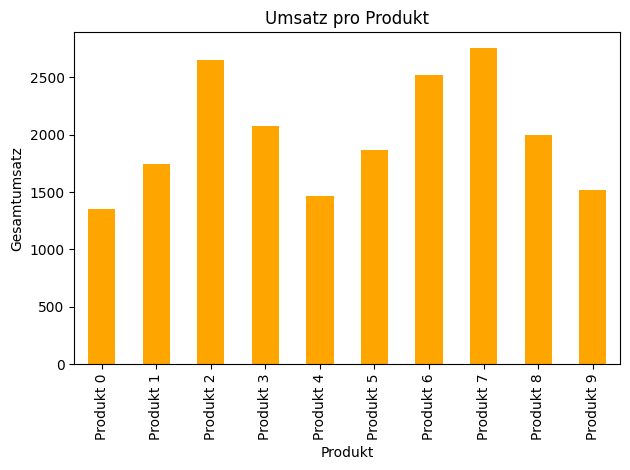

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
projekt2_data = pd.read_csv("verkaufsdaten.csv")
projekt2_data["Datum"] = pd.to_datetime(projekt2_data["Datum"])

# Gruppierung der Umsätze nach Produkt
umsatz_pro_produkt = projekt2_data.groupby("Produkt")["Gesamtumsatz"].sum()

# Balkendiagramm erstellen
umsatz_pro_produkt.plot(kind="bar", title="Umsatz pro Produkt", ylabel="Gesamtumsatz", xlabel="Produkt", color="orange")
plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

# Fehlende Werte behandeln
projekt3_data = projekt2_data.copy()
projekt3_data.fillna(0, inplace=True)

# Daten filtern (z. B. nur Daten mit Gesamtumsatz > 1000)
filtered_data = projekt3_data[projekt3_data["Gesamtumsatz"] > 1000]

# Kategorische Merkmale encodieren
label_encoder = LabelEncoder()
filtered_data["Produkt_Encoded"] = label_encoder.fit_transform(filtered_data["Produkt"])
filtered_data["Kategorie_Encoded"] = label_encoder.fit_transform(filtered_data["Kategorie"])

Kategorische Merkmale:
Empty DataFrame
Columns: [Datum, Produkt, Kategorie, Preis, Menge, Rabatt, Gesamtumsatz, Produkt_Encoded, Kategorie_Encoded]
Index: []
